# Loan Applicant's Risk Classification

-----------------------------------------------------------------------

## Import required libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [32]:
pwd

'C:\\Users\\gohil\\Desktop\\GOAL\\FINGERTIPS\\4. MACHINE LEARNING\\PROJECTS\\Python Project 7 KNN Classification - Loan_Applicant_Risk_Classification'

## Load the data

In [33]:
df = pd.read_excel("Loan_applicants_risk_classification.xlsx")
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [34]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [36]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [37]:
df.rename({'Total Work Experience': 'Total_Work_Experience',
           'Number of years in city': 'Number_of_years_in_city', 
           'Cost to Request Ratio': 'Cost_to_Request_Ratio', 
           'Cibil score': 'Cibil_score', 
           'Overdrafts past12months': 'Overdrafts_past_12_months',
           'Total bounces past12months': 'Total_bounces_past_12_months'}, inplace=True, axis=1)

Text(0.5, 1.0, 'Age wise Total Work Experience')

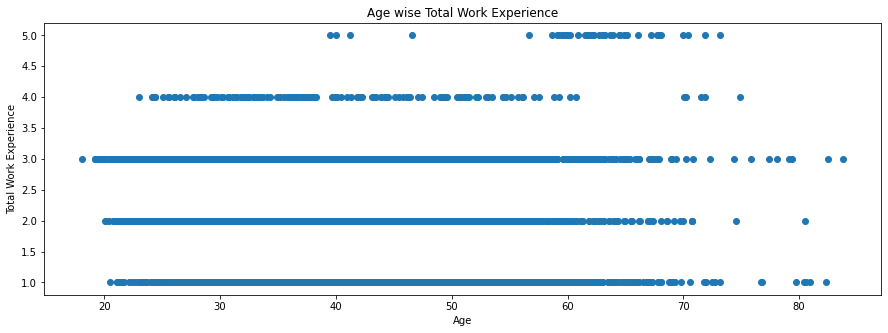

In [38]:
#Display scatterplot between age & Total work Experience
plt.figure(figsize=(15,5))
plt.scatter(df.Age, df.Total_Work_Experience);
plt.xlabel("Age")
plt.ylabel("Total Work Experience")
plt.title("Age wise Total Work Experience")

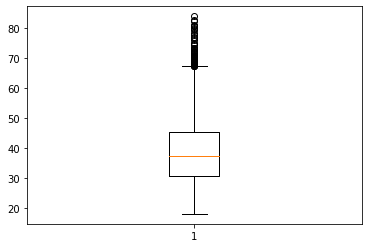

In [39]:
#Display box plot for age
plt.boxplot(df.Age);

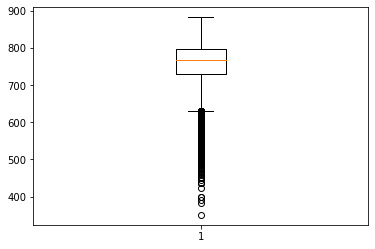

In [40]:
#Display box plot for Cibil score
plt.boxplot(df.Cibil_score);

### Scaling the feature column

In [41]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

df[["Age","Cibil_score"]] = standardscaler.fit_transform(df[["Age","Cibil_score"]])

In [42]:
df

,Age,Total_Work_Experience,Number_of_years_in_city,Cost_to_Request_Ratio,Cibil_score,Overdrafts_past_12_months,Total_bounces_past_12_months
0,0.165817,2,6,0.842666,-2.345089,0,0
1,0.239326,5,2,0.791667,0.020304,0,0
2,0.067805,5,2,0.727273,0.389897,0,0
3,-0.373251,1,4,0.820232,0.966462,0,0
4,-0.471263,3,3,0.455581,1.483891,0,1
...,...,...,...,...,...,...,...
8990,-0.784902,3,3,0.596748,0.153358,0,0
8991,-0.683949,3,6,0.986793,-3.261679,0,0
8992,-0.601619,2,5,0.628330,-2.404224,0,0
8993,-0.177226,3,3,0.797193,0.877759,0,0


### Create features and target data

In [43]:
X = df.drop("Total_bounces_past_12_months", axis=1)
Y = df.Total_bounces_past_12_months

In [44]:
X.head()

,Age,Total_Work_Experience,Number_of_years_in_city,Cost_to_Request_Ratio,Cibil_score,Overdrafts_past_12_months
0,0.165817,2,6,0.842666,-2.345089,0
1,0.239326,5,2,0.791667,0.020304,0
2,0.067805,5,2,0.727273,0.389897,0
3,-0.373251,1,4,0.820232,0.966462,0
4,-0.471263,3,3,0.455581,1.483891,0


In [45]:
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Total_bounces_past_12_months, dtype: int64

In [46]:
Y.value_counts()

0     5874
1     1212
2      535
3      335
4      212
5      173
6      133
7      132
8      110
9       89
10      76
11      72
12      42
Name: Total_bounces_past_12_months, dtype: int64

### Split Training and Testing data sets

In [47]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Fit the KNN model with default parameters

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

### Training and testing accuracy

In [49]:
print("Training Accuracy:", knn.score(X_train,Y_train))
print("Testing Accuracy:", knn.score(X_test, Y_test))

Training Accuracy: 0.7270705947748749
Testing Accuracy: 0.6892718176764869


In [50]:
#Let's predict out X_test data
Y_pred = knn.predict(X_test)

In [51]:
# Comparison between Predicted values and Actual values
comparison = pd.DataFrame(list(zip(Y_test, Y_pred)),
               columns =['Actual', 'Predicted'])
comparison[:10]

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,1
5,1,0
6,0,0
7,3,0
8,0,1
9,0,0


### Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.6892718176764869

### Try 1 to 14 k values for KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(X_train,Y_train)
    
    train_scores.append(model.score(X_train,Y_train))
    test_scores.append(model.score(X_test,Y_test))

In [53]:
df_k_14 = list(zip(train_scores,test_scores))
df_k_14 = pd.DataFrame(df_k_14, columns=['train_scores','test_scores'])
df_k_14

,train_scores,test_scores
0,1.000000,0.586437
1,0.790439,0.678710
2,0.755420,0.675931
3,0.735409,0.689272
4,0.727071,0.689272
5,0.722763,0.695386
6,0.716648,0.701501
7,0.711923,0.702613
8,0.708171,0.705392
9,0.705670,0.705392


### Display training and testing score for that 1 to 14 k values 

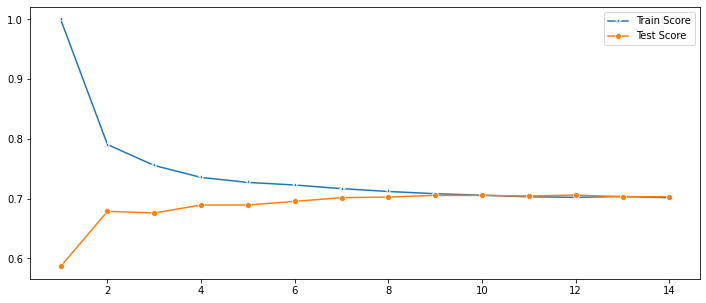

In [54]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score');